In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from rubin_sim.selfcal import generate_catalog, OffsetSys, OffsetSNR
import sqlite3
from rubin_sim.data import get_baseline

from rubin_sim.utils import healbin
import healpy as hp

In [2]:
ss = np.load('solved_stars.npz')['result']

In [3]:
sp = np.load('solved_patches.npz')['result']

In [4]:
ss['id']

array([      2,       3,       5, ..., 1337078, 1337079, 1337080])

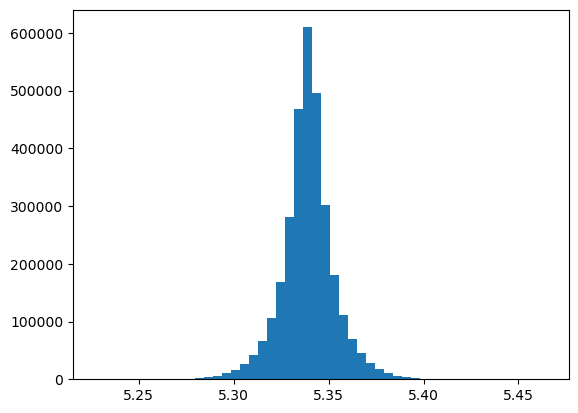

In [5]:
_temp = plt.hist(sp['zp'], bins=50)

In [6]:
filter_name = "r"
con = sqlite3.connect("msrgb_1e6.sqlite")
stars_df = pd.read_sql("select id,ra,decl,%smag from stars;" % filter_name, con)
con.close()

# what is the right way to do this? There's gotta be a better way!
names =['id', 'ra', 'decl', '%smag' % filter_name]
types = [int, float, float, float]
stars = np.empty(stars_df.shape[0], dtype=list(zip(names, types)))
for key in names:
    stars[key] = stars_df[key].values


In [7]:
stars_trimmed = stars[np.in1d(stars['id'], ss['id'])]

In [8]:
stars_trimmed

array([(      2,   0.368681, -89.0753  , 17.0235),
       (      3,   2.44785 , -89.4834  , 17.0241),
       (      5,   6.99438 , -89.0523  , 17.0197), ...,
       (1337078, 337.148   ,  -0.788291, 17.0773),
       (1337079, 345.546   ,  -0.758393, 18.3683),
       (1337080, 353.166   ,  -0.94849 , 17.9173)],
      dtype=[('id', '<i8'), ('ra', '<f8'), ('decl', '<f8'), ('rmag', '<f8')])

In [9]:
ss

array([(      2, 11.68996614), (      3, 11.69500732),
       (      5, 11.6776505 ), ..., (1337078, 11.73849224),
       (1337079, 13.02837297), (1337080, 12.5819877 )],
      dtype=[('id', '<i8'), ('fitMag', '<f8')])

In [10]:
resid = stars_trimmed['rmag'] - ss['fitMag']
resid = resid - np.median(resid)

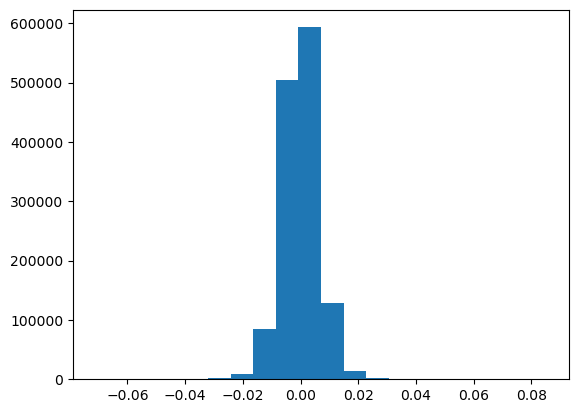

In [11]:
_temp = plt.hist(resid, bins=20)

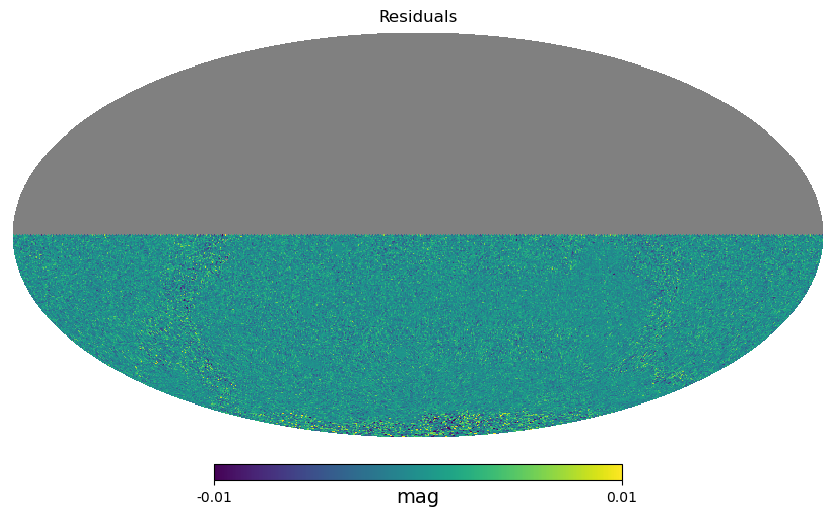

In [13]:
resid_map = healbin(stars_trimmed["ra"], stars_trimmed["decl"], resid, 128, reduce_func=np.mean)
hp.mollview(resid_map, min=-.01, max=.01, title='Residuals', unit='mag')

In [14]:
np.std(resid)

0.0061341755157890065